# Introducción a bases de datos relacionales y SQL para científicos sociales
> "Conceptos fundamentales para entender qué es SQL y por qué deberíamos usarlo"
- toc: true
- badges: true
- comments: true
- categories: [sql]
- permalink: /intro-sql-sociales/

> Elaborado por Juan Javier Santos Ochoa ([@jjsantoso](https://twitter.com/jjsantoso))

## Introducción

En ciencias sociales trabajamos mucho con datos para hacer investigación cuantitativa. Casi siempre, nuestros inicio en el manejo de datos se da en cursos de estadística, por lo que las funciones que necesitamos aprender son leer, procesar y reestructurar datos para luego visualizar variables y estimar modelos estadísticos. Como parte de nuestra práctica, normalmente guardamos la información en formatos de archivos como XLSX (Excel), CSV (comma separated values), TXT (texto plano), DTA (Stata), SAV (SPSS), Rdata (R) y trabajamos con Software de análisis de datos como Stata, R, SPSS, Python, SAS, entre otros. Además, solemos estructurar nuestra información de forma tal que toda quede en una única tabla. Llamemos a estas practicas como la **"forma usual de trabajar"**.

Esta forma usual de trabajar tiene ventajas para nosotros porque nos facilita concentrarnos en procesar y analizar datos, en lugar de preocuparnos por la administración de la información. La mayoría de las veces se trata de tareas que solo ejecutaremos unas pocas veces en nuestra computadora y en las que no es necesario que otras personas puedan acceder a nuestros datos. Además, suele ser información que no se actualiza de forma continua y de una escala relativamente pequeña. Sin embargo, cuando nos enfrentamos a alguna de las situaciones que acabdo de describir anteriormente, ya no es tan conveniente seguir este flujo de trabajo. Pese a que existen desde hace mucho otras formas de trabajar cuando el proceso de manejo de datos se vuelve más complejo, normalmente desconocemos por completo otras alternativas. Una de esas alternativas son las bases de datos relacionales.

A lo largo de esta sesión veremos cuáles son las situaciones en las que podemos considerar el uso de base de datos relacionales, cuáles son sus características y cómo podemos consultarlas. Empecemos primero viendo con un poco más de detalles las limitantes en la forma usual de trabajar .

## Limitantes de la forma usual de trabajar

* **Dificultad para leer y actualizar los datos**: Los archivos planos (csv, txt) o binarios (Excel, Rdata, dta, etc) son difíciles de leer y actualizar. Siempre que se leen se debe abrir el archivo completo, aunque solo se necesite trabajar con unas pocas observaciones. Además, para agregar nuevos registros se requiere primero cargar todos los datos en memoria y luego volverlos a escribir nuevamente al disco, lo que es un proceso computacionalmente muy costoso.

* **Imposibilidad para modificar por varios usuarios**: Estos archivos normalmente solo están disponibles de forma local (en nuestra computadora), por lo que solo pueden ser usados por un usuario a la vez. Una vez un usuario hace modificaciones, es difícil mantener a los demás usuarios con la información actualizada. Aún peor, si varios usuarios modifican los datos de forma individual, luego es muy difícil conciliar las diferentes versiones. Si bien existen alternativas en la nube (hojas de cálculo de Google, Excel online), estas están diseñadas para trabajar de forma interactiva, no programática.

* **No hay validación de datos**: no hay una forma fácil de validar o aplicar restricciones sobre los datos nuevos que se ingresan en la base de datos. Una validación puede ser, por ejemplo, si tengo una variable numérica, no puedo guardar ahí un dato que es de texto, u otro  ejemplo es verificar que un nuevo valor que voy a ingresar esté dentro de un catálogo de opciones predeterminadas.

* **Falta de autenticación y permisos**: no hay mecanismos para controlar qué usuarios pueden acceder a la información y qué facultades tienen para modificarla.

* **No asegura atomicidad de las transacciones** : La atomicidad se refiere a que al hacer un conjunto de operaciones en una base de datos, ante un fallo el resultado no puede quedar a medias, el proceso se hace completo o no se hace nada.

* **Los datos deben caber en memoria RAM**: la mayoría de software estadísticos deben leer los datos y guardarlo en la memoria RAM para poder trabajar con ellos, por lo que hay un límite sobre la cantidad de información que se puede analizar.

* **Redundancia**: cuando se intenta que toda la información de un proyecto esté en una sola tabla de datos, muchas veces es necesario repetir la información.

Todas estas limitaciones pueden ser abordadas usando sistemas de administración de bases de datos.

# Sistemas de administración de bases de datos.

Antes que nada, hay que aclarar algo. En ciencias sociales le llamamos base de datos a cualquier archivo que contenga datos, pero tecnicamente esto no es correcto. Los ingenieros de sistemas entienden algo más complejo cuando se habla de bases de datos. Hay cierta ambiguedad en el término, pero cuando hablamos de bases de datos normalmente hacemos referencia a los Sistemas de Administración de Bases de Datos (DBMS, por sus siglas en inglés) que son sitemas que simplifican la administración de los datos de una forma organizada y consistente. Otras veces el término base de datos puede hacer referencia a un conjunto de datos guardado en un DBMS. Aunque se suelen usar indistintamente, tratemos de dar una definción a cada concepto:

* **Base de datos**: es una colección estructurada de datos sobre **entidades** y sus **relaciones**. Modela objetos de la vida real -entidades y relaciones- y captura su estructura en formas que permiten que estas entidades y relaciones puedan ser consultadas para hacer análisis.

* **Sistema de administración de bases de datos (DBMS)**: es un software diseñado para guardar bases de datos de forma segura y manejarlas eficientemente, además de cumplir con otras tareas de mantenimiento y consulta de las entidades y relaciones que la base de datos representa. Hay muchos tipos de DBMS que tienen funciones especiales para diferentes casos de uso.

## Bases de datos relacionales

En una base de datos relacional tenemos **tablas** que representan distintas entidades y **relaciones** que indican relaciones entre los objetos guardados en las tablas.

* Una tabla es un arreglo en filas y columnas, donde cada fila representa una observación y cada columna es un atributo de las observaciones. Es como una hoja de excel. 
    * Las columnas, también conocidas como **campos**, tienen un nombre y un **tipo**, que indica el tipo de información que se puede guardar (número, texto, fecha, etc). Todos los datos de una columna deben ser del mismo tipo. 
    * Toda tabla debería tener una columna que es conocida como la **llave primaria** (*primary key* o PK) que debe tener un valor único dentro de la tabla y permite identificar a cada observación. Usualmente es un número entero.
* Las relaciones son vínculos entre un objeto de una tabla y uno o varios objetos en otras tablas. 
    * La relación entre tablas permite guardar estructuras de datos muy complejas de forma mucho más sencillas.
    * Hay varios tipos de relaciones: uno a uno, uno a muchos y muchos a muchos.
    * Cuando se crea una relación se genera un **llave externa** (*Foreign Key* o FK) en la tabla.

A la información que comprende las tablas, los campos de las tablas junto con el tipo de dato y las relaciones entre las tablas se le conoce como el **esquema** de la base de datos. Toda esta información se puede de comprender de forma mucho más fácil mediante un diagrama conocido como **diagrama Entidad-Relación**.

Es muy importante cuando se trabaja con una base de datos pensar en cada tabla como una **entidad**, esto es como si fuera el objeto independiente más sencillo con el que podemos trabajar, y luego crear las relaciones entre las entidades.

Como ejemplo de estos conceptos pensemos en una escuela donde se ofrece cursos a los alumnos, y estos cursos son dictados por profesores. Tenemos entonces tres entidades: *cursos*, *profesores* y *estudiantes*. Cada una de estas entidades es una tabla que tiene distintos atributos y además hay una relación clara entre ellas: todo curso tiene un profesor y uno o varios alumnos. El diagrama entidad-relación es el siguiente:
    
    

 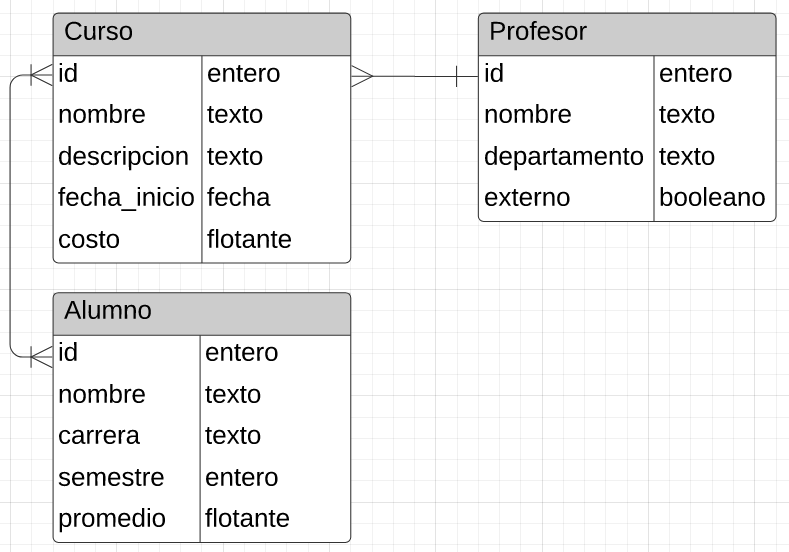

Las tablas con los datos se verían de la siguiente manera:

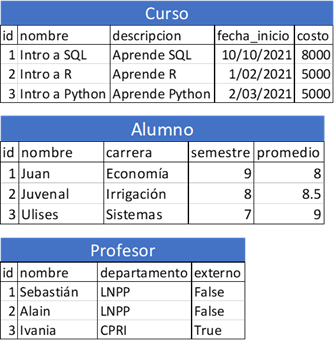


## Structured Query Language (SQL)

SQL (pronunciado como sicuel o ese-cu-ele) es un lenguaje para manejar bases de datos. Sirve para crear, modificar y eliminar bases de datos, tablas, campos, datos, así como también para consultar los elementos dentro de una base de datos. SQL es realmente un estándar, ya que cada DBMS tiene su propio lenguaje y funciones, sin embargo, casi todas las bases de datos relacionales soportan las características básicas de SQL, aunque con ligeras variaciones.



Este tutorial trataremos más adelante cómo hacer consultas de información con SQL. En otro se tratará la definición de bases de datos.

## SQL vs NoSQL

Los DBMS se suelen clasificar en dos grandes grupos: SQL y NoSQL. Cuando los datos con los que trabajamos son *estructurados* es decir, tienen un equema que puede ser facilmente representados en tablas con filas y columnas, entonces se usan DBMS relacionales conocidos como SQL. Entre los más populares están:
* SQLite
* MySQL
* PostgreSQL
* MariaDB
* Oracle Database.
* Google BigQuery

Por otro lado, existen otros DBMS conocidos como NoSQL (*Not only SQL*) que son adecuados cuando los datos son no estructurados, es decir no tienen una estructura definida y cada observación puede constar de distintos campos y de tipos de datos mucho más complejos. Normalmente se usan cuando se trata de bases de datos muy grandes o que representan datos especiales, como por ejemplo las redes. Estas bases de datos suelen tener sus propios lenguajes de consulta, diferentes a SQL. Entre las más populares están:
* MongoDB
* Neo4J
* Cassandra
* Redis

La decisión sobre qué tipo de base de datos es la mejor dependerá siempre del proyecto específico en el que se trabaje y las tareas que se requieran.
En este tutorial usaremos [SQLite](https://www.sqlite.org/index.html).

## Cuando usar una DBMS

Si hemos estudiado alguna carrera de ciencias sociales, probablemente nos costará trabajo empezar a crear y administrar nuestras propias bases de datos porque hay reglas y protocolos  para los que se requiere mucha práctica para aprender a ejecutar correctamente. El diseño y puesta en producción de una base de datos debe hacerlo alguien con experiencia.

Aún cuando puede ser cierto que nosotros nunca vayamos a crear una base de datos desde cero, es necesario que aprendamos los fundamentos de las bases de datos por varias razones.
1. El modelo relacional es una forma poderosa de organizar la información. 
2. Cada vez es más común el uso de SQL dentro de proyectos de ciencia de datos.
3. Si alguna vez tienes que proveer datos para un sistema de base de datos, podrás entender mejor cómo pasar la información al encargado de su administración.
4. Si entiendes sus ventajas podrás recomendarlo en los casos en que es conveniente su uso.

Sobre este último punto, deberíamos optar por usar un DBMS en cualquiera de las siguientes situaciones:
* Requerimos consultar o actualizar los datos de forma constante.
* Los datos deben ser consultados o editados por varios usuarios de forma remota.
* Tenemos información que está en muchos archivos pero que está relacionada, y que ademas debe cumplir con ciertas restricciones, como asegurar que los valores pertenezcan a un catálogo.
* Necesitamos analizar datos muy grandes que no caben en memoria RAM.
* Cuando creamos un producto basado en datos para producción, por ejemplo páginas web o aplicaciones de escritorio.
* Necesitamos autenticación de usuarios y/o diferentes permisos para administrar los datos.
* Cuando necesitamos garantizar atomicidad.



# SQLite
> La mayor parte del contenido de aquí en adelante fue tomado de: [Data Management with SQL for Social Scientists](https://datacarpentry.org/sql-socialsci/)

En este tutorial veremos una corta introducción a los comandos más comunes para consultar la información de una base de datos. Hacer consultas es una tarea relativamente sencilla que todos deberíamos aprender. 

Para esto usaremos SQlite, que es un DBMS sencillo, adecuado para aplicaciones locales que requieren tipos de datos básicos y pocas funciones avanzadas. No provee un sistema de autenticación y permisos y tampoco soporta escritura de varias conexiones al mismo tiempo, pero es fácil de iniciar y ayuda a mostrar las principales características del lenguaje de consulta. Aunque no es adecuado para aplicaciones empresariales, puede ser buena opción para hacer análisis de datos.

## Cliente 

Los clientes son programas que permiten conectarse a bases de datos y efectuar operaciones sobre ellas a través de una interfaz de usuario.

Usaremos el cliente **DB Browser for SQLite** una aplicación ligera que puede ser descargada desde su página web: https://sqlitebrowser.org/dl/

Una vez instalado se puede buscar en los programas como DB Browser (SQLite).

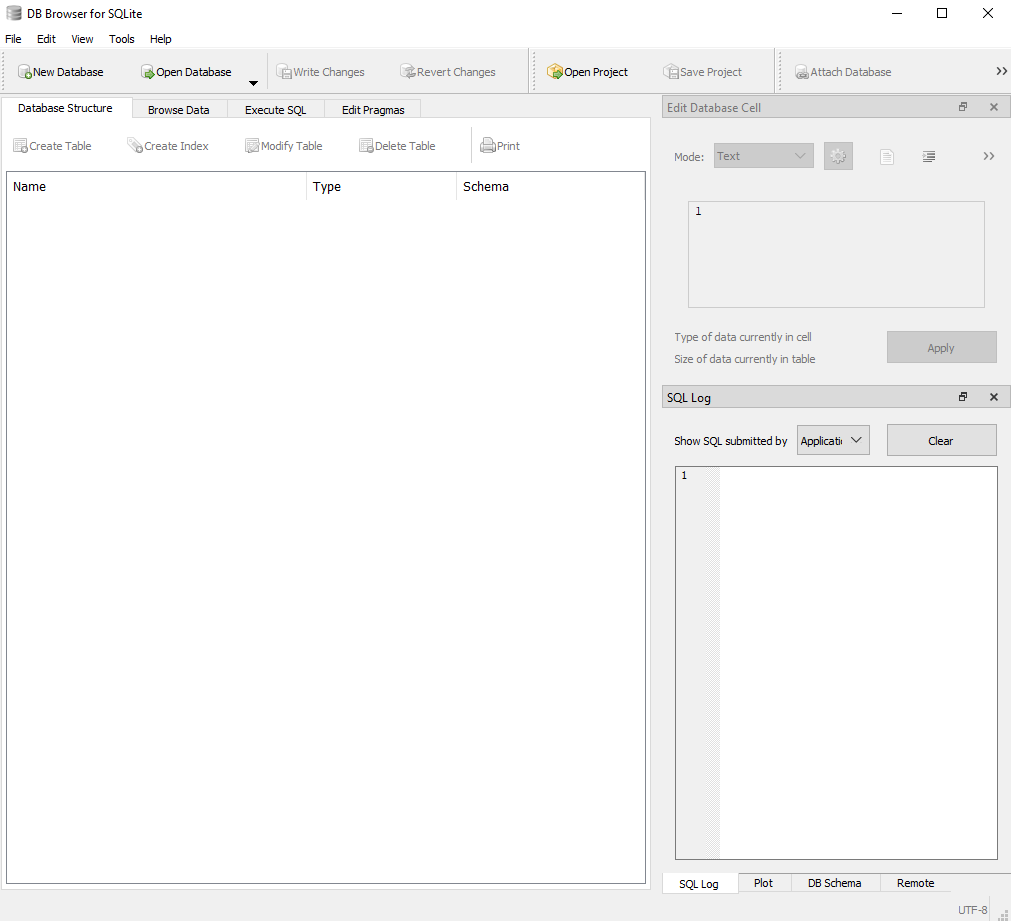

## Abrir una base de datos

* Usaremos una base de datos sobre cultivos del proyecto [SAFI (Studying African Farmer-led Irrigation)](http://www.safi-research.org/). Los datos vienen en el archivo "SQL_SAFI.sqlite", que también puede ser descargado desde https://datacarpentry.org/sql-socialsci/data/SQL_SAFI.sqlite. Esta base de datos consta de 4 tablas que describen un conjunto de granjas (Farms), parcelas (Plots) y cultivos (Crops & crops_rice_old).
* Vamos al cliente y hacemos clic en el botón de "Open Database". Buscamos en nuestros archivos y seleccionamos ""SQL_SAFI.sqlite""
* Cuando se abre, en la pestaña "Database Structure" veremos lo siguiente:

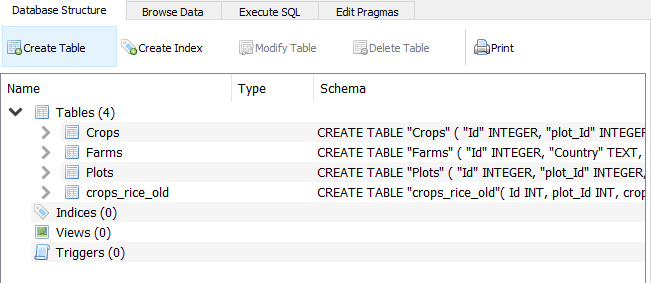

* Tenemos 4 tablas: Crops, Farms, Plots y crops_rice_old.
* Si damos clic sobre las $>$ de cada tabla podremos ver los campos  que tiene cada una y su tipo:

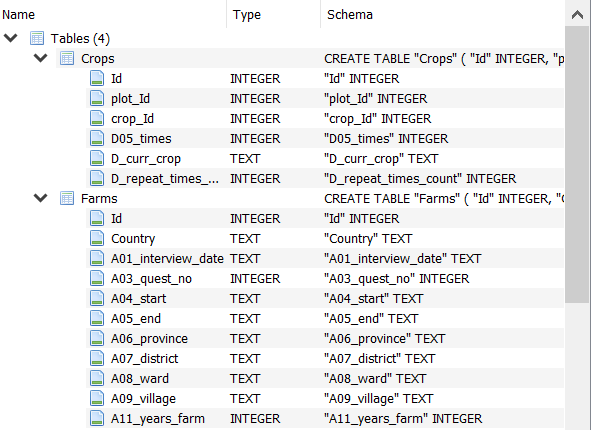

* Al seleccionar la pestaña "Browse Data" se puede ver la tabla con los datos.
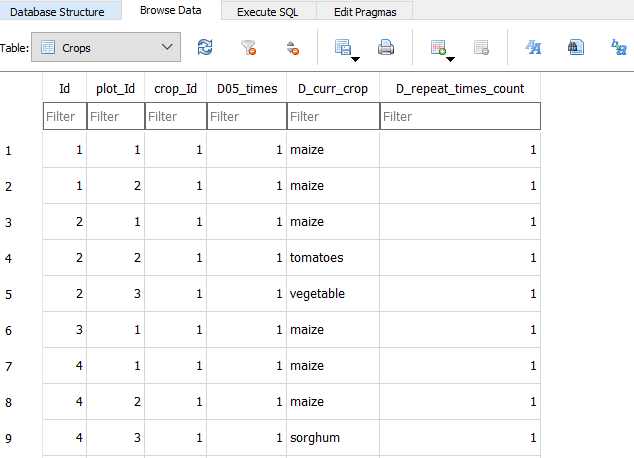

# Consultas SQL

* Para consultar la información usamos el lenguaje SQL. 
* Toda consulta SQL debe llevar al menos dos comandos: SELECT y FROM
    * con SELECT especificamos las columnas que queremos recuperar
    * con FROM especificamos la tabla que vamos a consultar
    
Un ejemplo de consulta es:
```sql
SELECT *
FROM Crops
```
    
* Los comandos de SQL normalmente se escriben en mayúsculas, aunque no es necesario, pero así se distingue mejor cuáles con los comandos de los nombres las variable o tablas. 
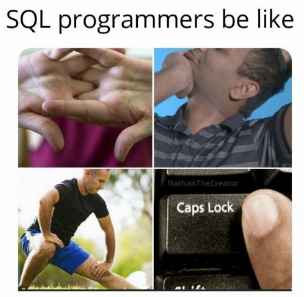

* Tampoco es necesario escribirlos en líneas separadas, pero se hace más legible así.
* Vamos a la pestaña "Execute SQL" de DB Browser y copiamos el siguiente código:
```sql
SELECT *
FROM Crops
```
* La instrucción se ejecuta con el botón ▶ del menú.

Obtenemos como resultado una tabla con todas las filas y columnas de la tabla Crops:

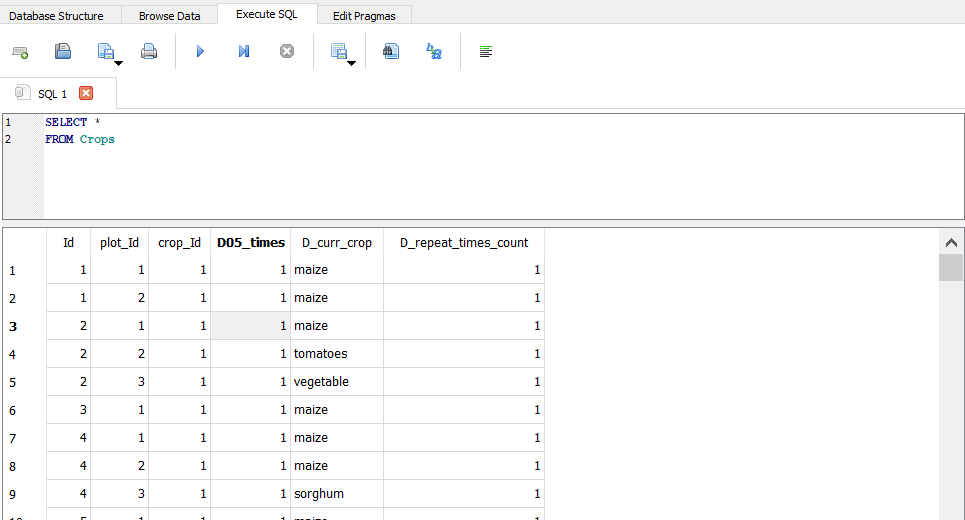

* El resultado de una consulta SQL siempre es una tabla.
* A continuación veremos los comandos más populares para consultar la información.
* Puedes seguir este tutorial usando DB Browser o también si tienes instalada la distribución de Python de [Anaconda](https://www.anaconda.com/products/individual), puedes instalar la extensión [ipython-sql](https://pypi.org/project/ipython-sql/) que permite ejecutar SQL dentro de un Jupyter Notebook.
* Si sigues en DB browser, debes copiar el código de cada celda sin la primera fila (%%sql)

In [1]:
# configuración de la conexión
# Esta instrucción solo funciona dentro de un Jupyter Notebook
# pip install ipython-sql
%load_ext sql
%sql sqlite:///SQL_SAFI.sqlite
%config SqlMagic.displaylimit=10

## SELECT

* Con SELECT especificamos los nombres de las columnas que queremos que nos retorne la consulta.
* Podemos especificar uno o varios nombres de columnas, separados por comas.
* El * quiere decir que retorne todas las columnas.

In [2]:
%%sql
SELECT id, Country, A06_province
FROM Farms

 * sqlite:///SQL_SAFI.sqlite
Done.


Id,Country,A06_province
1,Moz,Manica
2,Moz,Manica
3,Moz,Manica
4,Moz,Manica
5,Moz,Manica
6,Moz,Manica
7,Moz,Manica
8,Moz,Manica
9,Moz,Manica
10,Moz,Manica


* Las variables pueden ser renombrar en el resultado usando la palabra AS

In [3]:
%%sql
SELECT Country AS pais, A06_province AS provincia
FROM Farms

 * sqlite:///SQL_SAFI.sqlite
Done.


pais,provincia
Moz,Manica
Moz,Manica
Moz,Manica
Moz,Manica
Moz,Manica
Moz,Manica
Moz,Manica
Moz,Manica
Moz,Manica
Moz,Manica


## LIMIT

* Especifica el número máximo de filas a retornar

In [4]:
%%sql
SELECT *
FROM Farms
LIMIT 5

 * sqlite:///SQL_SAFI.sqlite
Done.


Id,Country,A01_interview_date,A03_quest_no,A04_start,A05_end,A06_province,A07_district,A08_ward,A09_village,A11_years_farm,A12_agr_assoc,B_no_membrs,_members_count,B11_remittance_money,B16_years_liv,B17_parents_liv,B18_sp_parents_liv,B19_grand_liv,B20_sp_grand_liv,C01_respondent_roof_type,C02_respondent_wall_type,C03_respondent_floor_type,C04_window_type,C05_buildings_in_compound,C06_rooms,C07_other_buildings,D_no_plots,D_plots_count,E01_water_use,E_no_group_count,E_yes_group_count,E17_no_enough_water,E18_months_no_water,E19_period_use,E20_exper_other,E21_other_meth,E22_res_change,E23_memb_assoc,E24_resp_assoc,E25_fees_water,E26_affect_conflicts,F04_need_money,F05_money_source,F05_money_source_other,F08_emply_lab,F09_du_labour,F10_liv_owned,F10_liv_owned_other,F_liv_count,F12_poultry,F13_du_look_aftr_cows,F14_items_owned,G01_no_meals,G02_months_lack_food,G03_no_food_mitigation,gps:Latitude,gps:Longitude,gps:Altitude,gps:Accuracy,instanceID
1,Moz,17/11/2016,1,2017-03-23T09:49:57.000Z,2017-04-02T17:29:08.000Z,Manica,Manica,Bandula,God,11,no,3,3,no,4,no,yes,no,yes,grass,muddaub,earth,no,1,1,no,2,2,no,2.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,no,no,['poultry'],None,1,yes,no,"['bicycle', 'television', 'solar_panel', 'table']",2,['Jan'],"['na', 'rely_less_food', 'reduce_meals', 'day_night_hungry']",-19.11225943,33.48345609,698.0,14.0,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef
2,Moz,17/11/2016,1,2017-04-02T09:48:16.000Z,2017-04-02T17:26:19.000Z,Manica,Manica,Bandula,God,2,yes,7,7,no,9,yes,yes,yes,yes,grass,muddaub,earth,no,1,1,no,3,3,yes,None,3.0,yes,"['Aug', 'Sept']",2.0,yes,no,None,yes,no,no,once,no,None,None,yes,no,"['oxen', 'cows', 'goats']",None,3,yes,no,"['cow_cart', 'bicycle', 'radio', 'cow_plough', 'solar_panel', 'solar_torch', 'table', 'mobile_phone']",2,"['Jan', 'Sept', 'Oct', 'Nov', 'Dec']","['na', 'reduce_meals', 'restrict_adults', 'borrow_food', 'seek_government']",-19.11247712,33.48341568,690.0,19.0,uuid:099de9c9-3e5e-427b-8452-26250e840d6e
3,Moz,17/11/2016,3,2017-04-02T14:35:26.000Z,2017-04-02T17:26:53.000Z,Manica,Manica,Bandula,God,40,no,10,10,no,15,no,no,no,no,mabatisloping,burntbricks,cement,yes,1,1,no,1,1,no,1.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,no,yes,['none'],None,1,yes,no,['solar_torch'],2,"['Jan', 'Feb', 'Mar', 'Oct', 'Nov', 'Dec']","['na', 'restrict_adults', 'lab_ex_food']",-19.1121076,33.48344998,674.0,13.0,uuid:193d7daf-9582-409b-bf09-027dd36f9007
4,Moz,17/11/2016,4,2017-04-02T14:55:18.000Z,2017-04-02T17:27:16.000Z,Manica,Manica,Bandula,God,6,no,7,7,no,6,no,no,no,no,mabatisloping,burntbricks,earth,no,1,1,no,3,3,no,3.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,no,yes,"['oxen', 'cows']",None,2,yes,no,"['bicycle', 'radio', 'cow_plough', 'solar_panel', 'mobile_phone']",2,"['Sept', 'Oct', 'Nov', 'Dec']","['na', 'reduce_meals', 'restrict_adults', 'lab_ex_food']",-19.11222901,33.48342395,679.0,5.0,uuid:148d1105-778a-4755-aa71-281eadd4a973
5,Moz,17/11/2016,5,2017-04-02T15:10:35.000Z,2017-04-02T17:27:35.000Z,Manica,Manica,Bandula,God,18,no,7,7,no,40,yes,no,yes,no,grass,burntbricks,earth,no,1,1,no,2,2,no,2.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,no,no,"['oxen', 'cows', 'goats', 'poultry']",None,4,yes,no,"['motorcyle', 'radio', 'cow_plough', 'mobile_phone']",2,"['Aug', 'Sept', 'Oct', 'Nov']","['na', 'go_forest', 'migrate']",-19.11221722,33.48342524,689.0,10.0,uuid:2c867811-9696-4966-9866-f35c3e97d02d


### Práctica
* Escribe una consulta que retorne las primeras 5 filas de la tabla `Farms` solo con las columnas Id, y B16 a B20

## WHERE
* Este comando sirve para imponer una o varias condiciones. El resultado retornará solo las observaciones que cumplan con los criterios especificados.
* Se pueden usar operadores como $=$, $>$, $<$, $<=$, $>=$, $<>$
* Para especificar más de una condición se pueden usar los operadores lógicos AND y OR

In [5]:
%%sql
SELECT  Id, B16_years_liv
FROM Farms
WHERE B16_years_liv > 25

 * sqlite:///SQL_SAFI.sqlite
Done.


Id,B16_years_liv
5,40
7,38
8,70
15,30
16,47
27,36
32,69
33,34
35,45
43,29


* Varias condiciones

In [6]:
%%sql
SELECT  Id
FROM Farms
WHERE B17_parents_liv = 'yes' 
    AND B18_sp_parents_liv = 'yes' 
    AND B19_grand_liv = 'yes' 
    AND B20_sp_grand_liv = 'yes' 

 * sqlite:///SQL_SAFI.sqlite
Done.


Id
2
8
15
16
19
20
22
26
31
33


In [7]:
%%sql
SELECT Id, B16_years_liv
FROM Farms
WHERE B16_years_liv > 50 AND B16_years_liv < 60

 * sqlite:///SQL_SAFI.sqlite
Done.


Id,B16_years_liv
48,58
68,52
101,52
276,51
334,51
346,55


* Se puede usar el operador BETWEEN para especificar un rango de valores.

In [8]:
%%sql
SELECT Id, B16_years_liv
FROM Farms
WHERE B16_years_liv BETWEEN 51 AND 59

 * sqlite:///SQL_SAFI.sqlite
Done.


Id,B16_years_liv
48,58
68,52
101,52
276,51
334,51
346,55


* Se puede usar el operador IN para especificar una lista de valores.

In [9]:
%%sql
SELECT Id, B16_years_liv
FROM Farms
WHERE B16_years_liv IN (51, 52, 53, 54, 55, 56, 57, 58, 59)

 * sqlite:///SQL_SAFI.sqlite
Done.


Id,B16_years_liv
48,58
68,52
101,52
276,51
334,51
346,55


* Al poner varias condiciones, es recomendable agruparlas con paréntesis para evitar confusiones.

In [10]:
%%sql
SELECT  Id
FROM Farms
WHERE (B17_parents_liv = 'yes' OR B18_sp_parents_liv = 'yes') AND B16_years_liv > 60

 * sqlite:///SQL_SAFI.sqlite
Done.


Id
8
32
77
97
224
349


### Práctica
* Escribe una consulta con la tabla `Farms` que retorne las columnas `Id`, `A09_village`, `A11_years_farm`, `B16_years_liv`. Filtra las filas para quedarnos solo con las filas donde el valor de `A09_village` es `God` o `Ruaca`. Adicionalmente, solo queremos valores de `A11_years_farm` entre 20 y 30 y valores de `B16_years_liv` mayores que 40.

## seleccionar valores nulos

* Para seleccionar observaciones que tienen valores nulos se usa la condición IS NULL. 
* Para seleccionar los que son no nulos se usa IS NOT NULL

In [11]:
%%sql
SELECT B16_years_liv, F14_items_owned
FROM Farms
WHERE F14_items_owned IS NULL

 * sqlite:///SQL_SAFI.sqlite
Done.


B16_years_liv,F14_items_owned
3,None
20,None
2,None
2,None
22,None
15,None
60,None
10,None
41,None
49,None


In [12]:
%%sql
SELECT B16_years_liv, F14_items_owned
FROM Farms
WHERE F14_items_owned NOT NULL

 * sqlite:///SQL_SAFI.sqlite
Done.


B16_years_liv,F14_items_owned
4,"['bicycle', 'television', 'solar_panel', 'table']"
9,"['cow_cart', 'bicycle', 'radio', 'cow_plough', 'solar_panel', 'solar_torch', 'table', 'mobile_phone']"
15,['solar_torch']
6,"['bicycle', 'radio', 'cow_plough', 'solar_panel', 'mobile_phone']"
40,"['motorcyle', 'radio', 'cow_plough', 'mobile_phone']"
38,"['motorcyle', 'cow_plough']"
70,"['motorcyle', 'bicycle', 'television', 'radio', 'cow_plough', 'solar_panel', 'solar_torch', 'table', 'fridge']"
6,"['television', 'solar_panel', 'solar_torch']"
23,"['cow_cart', 'motorcyle', 'bicycle', 'television', 'radio', 'cow_plough', 'solar_panel', 'solar_torch', 'table']"
20,"['radio', 'cow_plough']"


## ORDER BY
* Esta instrucción sirve para ordenar las filas de la tabla

In [13]:
%%sql
SELECT Id, A09_village, A11_years_farm, B16_years_liv
FROM Farms
WHERE A09_village = 'God'
ORDER BY A11_years_farm

 * sqlite:///SQL_SAFI.sqlite
Done.


Id,A09_village,A11_years_farm,B16_years_liv
83,God,1,43
2,God,2,9
6,God,3,3
118,God,3,13
76,God,5,4
4,God,6,6
11,God,6,20
18,God,6,20
88,God,6,6
13,God,7,8


* Se puede especificar el orden ascendente o descendente con ASC o DESC, respectivamente.

In [14]:
%%sql
SELECT Id, A09_village, A11_years_farm, B16_years_liv
FROM Farms
WHERE A09_village = 'God'
ORDER BY A11_years_farm DESC

 * sqlite:///SQL_SAFI.sqlite
Done.


Id,A09_village,A11_years_farm,B16_years_liv
3,God,40,15
15,God,30,30
16,God,24,47
20,God,24,1
82,God,24,24
40,God,23,23
39,God,22,22
41,God,22,22
103,God,22,22
111,God,22,22


* Se puede ordenar por varias variables

In [15]:
%%sql
SELECT Id, A09_village, A11_years_farm, B16_years_liv
FROM Farms
WHERE A09_village = 'God'
ORDER BY A11_years_farm ASC , B16_years_liv DESC

 * sqlite:///SQL_SAFI.sqlite
Done.


Id,A09_village,A11_years_farm,B16_years_liv
83,God,1,43
2,God,2,9
118,God,3,13
6,God,3,3
76,God,5,4
11,God,6,20
18,God,6,20
4,God,6,6
88,God,6,6
84,God,7,48


* En conjunto con LIMIT nos puede dar el top N

In [16]:
%%sql
SELECT Id, A09_village, A11_years_farm, B16_years_liv
FROM Farms
WHERE A09_village = 'God'
ORDER BY A11_years_farm DESC
LIMIT 3

 * sqlite:///SQL_SAFI.sqlite
Done.


Id,A09_village,A11_years_farm,B16_years_liv
3,God,40,15
15,God,30,30
16,God,24,47


# Funciones y operaciones con columnas

* Es posible hacer algunas operaciones aritméticas entre columnas

In [17]:
%%sql
SELECT B16_years_liv * 100
FROM Farms

 * sqlite:///SQL_SAFI.sqlite
Done.


B16_years_liv * 100
400
900
1500
600
4000
300
3800
7000
600
2300


In [18]:
%%sql
SELECT B_no_membrs * B16_years_liv AS total_years
FROM Farms

 * sqlite:///SQL_SAFI.sqlite
Done.


total_years
12
63
150
42
280
9
228
840
48
276


* También se pueden usar funciones predeterminadas que transforman las variables. Hay funciones para números, para texto, para fechas, etc.
* La lista de funciones que se puede usar en SQLite están se pueden consultar en https://sqlite.org/lang_corefunc.html
* Por ejemplo, la función ROUND() redondea los valores de una columna.

In [19]:
%%sql
SELECT ROUND(D02_total_plot * 3.14159, 1) AS D02_rounded
FROM Plots

 * sqlite:///SQL_SAFI.sqlite
Done.


D02_rounded
1.6
1.6
3.1
4.7
3.1
3.1
3.1
3.1
3.1
4.7


* La función SUBSTR() sirve para obtener un subconjunto de caracteres de un texto, dada una posición inicial y un número de caracteres.
* La expresión CAST(variable AS INTEGER) convierte una variable de texto en número entero.

In [20]:
%%sql
SELECT CAST(SUBSTR(A01_interview_date,7,4) AS INTEGER) AS year
FROM Farms
ORDER BY A01_interview_date

 * sqlite:///SQL_SAFI.sqlite
Done.


year
2017
2017
2017
2017
2016
2016
2016
2016
2016
2016


* La expresión $||$ concatena dos variables de texto.

In [21]:
%%sql
SELECT A12_agr_assoc || ' & ' || B11_remittance_money AS assoc_remittance
FROM Farms

 * sqlite:///SQL_SAFI.sqlite
Done.


assoc_remittance
no & no
yes & no
no & no
no & no
no & no
no & no
no & no
yes & no
no & no
no & no


* Cuando se requiere ordenar por una fecha, es necesario convertir el texto en fecha, de lo contrario tendremos un orden que no es el adecuado.
* Se puede usar la función DATE() para pasar de texto a fecha. Para ello es necesario especificar el texto en formato YYYY-MM-DD.
* En el siguiente ejemplo, la variable `A01_interview_date` está guardada como texto en formato dd/mm/yyy, por tanto, cuando intentamos ordenar por esta variable obtenemos un orden distinto al que esperaríamos.


In [22]:
%%sql
SELECT A01_interview_date
FROM Farms
ORDER BY A01_interview_date

 * sqlite:///SQL_SAFI.sqlite
Done.


A01_interview_date
01/07/2017
01/07/2017
01/07/2017
01/07/2017
01/12/2016
01/12/2016
01/12/2016
01/12/2016
01/12/2016
01/12/2016


* En este caso lo que deberíamos hacer es reformar el texto para que quede en formato yyyy-mm-dd y usar la función DATE() para convertir en fecha.

In [23]:
%%sql
SELECT A01_interview_date,
       date(
       substr(A01_interview_date,7,4) || '-' ||
       substr(A01_interview_date,4,2) || '-' ||
       substr(A01_interview_date,1,2)
       ) AS converted_date
FROM Farms
ORDER BY converted_date

 * sqlite:///SQL_SAFI.sqlite
Done.


A01_interview_date,converted_date
16/11/2016,2016-11-16
16/11/2016,2016-11-16
16/11/2016,2016-11-16
16/11/2016,2016-11-16
16/11/2016,2016-11-16
16/11/2016,2016-11-16
16/11/2016,2016-11-16
16/11/2016,2016-11-16
16/11/2016,2016-11-16
16/11/2016,2016-11-16


## Práctica
* En la tabla `Farms`, usando la columna `A01_interview_date`, crea tres nuevas columnas que correspondan al año, mes y día. Luega ordena de forma descendente usando estas tres variables.

## CASE WHEN


* Con la expresión CASE ... WHEN ... podemos cambiar los valores de una variable por otros al momento de presentar la información

In [24]:
%%sql
SELECT Id, B16_years_liv,
    CASE country
        WHEN 'Moz' THEN 'Mozambique'
        WHEN 'Taz' THEN 'Tanzania'
    ELSE 'Unknown Country'
       END AS country_fullname
FROM Farms

 * sqlite:///SQL_SAFI.sqlite
Done.


Id,B16_years_liv,country_fullname
1,4,Mozambique
2,9,Mozambique
3,15,Mozambique
4,6,Mozambique
5,40,Mozambique
6,3,Mozambique
7,38,Mozambique
8,70,Mozambique
9,6,Mozambique
10,23,Mozambique


In [25]:
%%sql
SELECT Id, A11_years_farm,
       CASE
            WHEN  A11_years_farm BETWEEN 1 AND 30 THEN '1-30'
            WHEN  A11_years_farm BETWEEN 31 AND 60 THEN '31-60'
        ELSE '> 60'       
        END AS A11_years_farm_range
FROM Farms

 * sqlite:///SQL_SAFI.sqlite
Done.


Id,A11_years_farm,A11_years_farm_range
1,11,1-30
2,2,1-30
3,40,31-60
4,6,1-30
5,18,1-30
6,3,1-30
7,20,1-30
8,16,1-30
9,16,1-30
10,22,1-30


## Práctica
* En la tabla `Farms`, usando la columna `B_no_membrs`, crea una nueva variable llamada `tamaño_hogar` que tenga los siguientes casos:
    * Entre 1 y 4 -> pequeño
    * Entre 5 y 10 -> mediano
    * Mayor a 10 -> grande

## DISTINCT

* Podemos seleccionar los valores únicos de una o varias columnas con la expresión DISTINCT.

In [26]:
%%sql
SELECT DISTINCT A06_province
FROM Farms;

 * sqlite:///SQL_SAFI.sqlite
Done.


A06_province
Manica
Nampula
Sofala


In [27]:
 %%sql
SELECT DISTINCT A06_province, A07_district
FROM Farms

 * sqlite:///SQL_SAFI.sqlite
Done.


A06_province,A07_district
Manica,Manica
Manica,Bandula
Nampula,Nampula
Sofala,Nhamatanda
Sofala,51
Sofala,Nhamantanda
Sofala,Madangua
Sofala,Nhamatandda
Manica,Vanduzi
Manica,Va


# Agregaciones y agrupaciones

* Una de las características más útiles de SQL es la capacidad para calcular algunas estadísticas agregadas.
* Para agregar se usan algunas funciones como COUNT(), MAX(), MIN(), AVG()

In [28]:
%%sql
SELECT COUNT(A11_years_farm) AS n, MAX(A11_years_farm) AS maximo, MIN(A11_years_farm) AS minimo, ROUND(AVG(A11_years_farm), 2) as promedio
FROM Farms

 * sqlite:///SQL_SAFI.sqlite
Done.


n,maximo,minimo,promedio
350,60,1,17.51


* Podemos calcular estadísticas agrupadas usando la expresión GROUP BY

In [29]:
%%sql
SELECT
    A06_province, A07_district, A08_ward, A09_village,
    COUNT(A11_years_farm) AS n, MAX(A11_years_farm) AS maximo, MIN(A11_years_farm) AS minimo, ROUND(AVG(A11_years_farm), 2) as promedio
FROM Farms
GROUP BY A06_province, A07_district, A08_ward, A09_village

 * sqlite:///SQL_SAFI.sqlite
Done.


A06_province,A07_district,A08_ward,A09_village,n,maximo,minimo,promedio
Manica,Bandula,Bandula,Chirodzo,1,12,12,12.0
Manica,Manica,Bandula,49,1,12,12,12.0
Manica,Manica,Bandula,Chirodzo,36,60,1,17.61
Manica,Manica,Bandula,God,42,40,1,14.67
Manica,Manica,Bandula,Ruaca,45,53,2,15.73
Manica,Manica,Bandula,Ruaca - Nhamuenda,1,16,16,16.0
Manica,Manica,Bandula,Ruaca-Nhamuenda,3,21,1,12.0
Manica,Manica,Manica,Chirodzo,1,16,16,16.0
Manica,Manica,Manica,God,1,24,24,24.0
Manica,Va,Vanduzi,Belas,1,16,16,16.0


* Para filtrar los resultados de una consulta agregada usamos la declaración HAVING

In [30]:
%%sql
SELECT
    A06_province, A07_district, A08_ward, A09_village,
    COUNT(A11_years_farm) AS n, MAX(A11_years_farm) AS maximo,
    MIN(A11_years_farm) AS minimo, ROUND(AVG(A11_years_farm), 2) as promedio,
    SUM(A11_years_farm) as total
FROM Farms
GROUP BY A06_province, A07_district, A08_ward, A09_village
HAVING promedio > 20

 * sqlite:///SQL_SAFI.sqlite
Done.


A06_province,A07_district,A08_ward,A09_village,n,maximo,minimo,promedio,total
Manica,Manica,Manica,God,1,24,24,24.0,24
Sofala,Nhamatanda,91,Massequece,1,45,45,45.0,45
Sofala,Nhamatanda,Lamego,Massequese,1,42,42,42.0,42
Sofala,Nhamatanda,Lamego,Ndedja,6,35,10,27.5,165
Sofala,Nhamatanda,Lamego,Nhansato,48,50,3,25.94,1245
Sofala,Nhamatanda,Lamego,Nhansato-Castanheira,3,37,21,27.33,82
Sofala,Nhamatanda,Lomego,Massequece,1,40,40,40.0,40


## Práctica
* Usando la tabla `Plots`, calcula la extensión total y número de parcelas de cada granja. `Id` identifica cada granja y `D02_total_plot` es la extensión de cada parcela individual.
* Filtra para quedarte solo con aquellas granjas que tienen más de 10 hectáreas en total y además entre 2 y 3 parcelas.

# Uniones

* Hasta el momento hemos estado usando datos de una sola tabla,  pera para muchos casos quisieramos responder preguntas que involucren los datos de más de una tabla.
* Cuando queremos usar los datos de más de una tabla debemos hacer uniones con el comando JOIN. Esta unión se hace en la declaración FROM.
* En la siguiente consulta queremos saber en cuáles granjas con más de 12 miembros se cultiva maíz. La información del número de miembro de la granja está en la tabla Farms, pero la información del tipo de cultivo está en la tabla Crops. Por tanto, debemos hacer un JOIN entre las dos tablas.
* Cuando tenemos más de una tabla es usual renombrar las tablas con la declaración AS, para distinguir las variables que provienen de cada tabla y evitar problemas cuando haya variables con el mismo nombre.
* Con la expresión ON especificamos la variable de cada tabla con la que se hará el emparejamiento.

In [31]:
%%sql
SELECT 
    F.Id AS farm_id, F.B_no_membrs as farm_members,
    C.Id, C.D_curr_crop
FROM Farms AS F JOIN Crops AS C ON F.Id = C.Id
WHERE F.B_no_membrs > 12 AND C.D_curr_crop = 'maize'

 * sqlite:///SQL_SAFI.sqlite
Done.


farm_id,farm_members,Id,D_curr_crop
32,19,32,maize
92,17,92,maize
101,14,101,maize
103,15,103,maize
111,15,111,maize
111,15,111,maize
124,15,124,maize
253,15,253,maize


* Se pueden hacer joins con más de 2 tablas. En esta por ejemplo, estamos consultando cuáles son las parcelas que pertenecen a las granjas con más de 12 miembros, cultivan maíz y tienen una extensión mayor a 5 hectáreas.

In [32]:
%%sql
SELECT 
    F.Id AS farm_id, F.B_no_membrs AS farm_members,
    C.Id AS Crops_Id, C.plot_Id AS crops_plot_id, C.D_curr_crop,
    P.Id , P.plot_id AS plot_id, P.D02_total_plot
FROM Farms AS F
        JOIN Crops AS C
        JOIN Plots AS P
    ON F.Id = C.Id AND F.Id = P.Id AND C.Id = P.Id
WHERE F.B_no_membrs > 12 AND C.D_curr_crop = 'maize'  AND P.D02_total_plot > 5

 * sqlite:///SQL_SAFI.sqlite
Done.


farm_id,farm_members,Crops_Id,crops_plot_id,D_curr_crop,Id,plot_id,D02_total_plot
32,19,32,1,maize,32,1,10.0
92,17,92,1,maize,92,1,6.0
92,17,92,1,maize,92,2,6.0
92,17,92,1,maize,92,3,6.0
103,15,103,3,maize,103,1,22.0
103,15,103,3,maize,103,2,16.0
124,15,124,1,maize,124,1,7.0


## Práctica
* Calcula el área total de maíz sembrado actualmente en cada villa. 
* Tenga en cuenta que la extensión de cada cultivo (`D02_total_plot`) está en la tabla `Plots`, el cultivo actual (`D_curr_crop`) está en la tabla `Crops` y la información de la villa (`A09_village`) en la tabla `Farms`

# Referencias

* [Data Management with SQL for Social Scientists](https://datacarpentry.org/sql-socialsci/)
* [Big Data & Social Science. Chpater 4: Databases](https://textbook.coleridgeinitiative.org/chap-db.html)
* [Curso gratuito en Udacity: SQL for Data Analysis](https://classroom.udacity.com/courses/ud198)